# Практические задания для самопроверки

**Примечание Л.М.**: при прохождении заданий на Stepik происходит проверка на внутренних файлах с указанными в заданиях названиями (обычно с названиями `img.png` и `out_img.png`). В блокноте Jupyter я для удобства использую локальные аналоги с названиями, используемыми в `Sample Input` и `Sample Output`.


# 2.1. Чтение, запись изображений. Работа с пикселями¶

## Количество столбцов

Прочитайте изображение из файла img.png и выведите количество столбцов этого изображения на стандартный вывод.

In [1]:
%matplotlib inline
from skimage.io import imread, imshow, imsave

In [2]:
img = imread('images/img.png')
img.shape[1]

419

## Изменение цвета пикселя изображения

Прочитайте изображение из файла `tiger-color.png`. У этого изображения нечетное количество строк и столбцов. Поменяйте цвет центрального пикселя этого изображения на зеленый цвет rgb (102, 204, 102) и сохраните изображение в файл `tiger-color-green-pixel.png`.

Для сравнения двух изображений можно воспользоваться функцией numpy.array_equal.

In [3]:
img = imread('images/tiger-color.png')
img_green_pixel = img.copy()
img_green_pixel[img.shape[0]//2, img.shape[1]//2] = [102, 204, 102]

imsave('images/tiger-green-pixel.png', img_green_pixel)

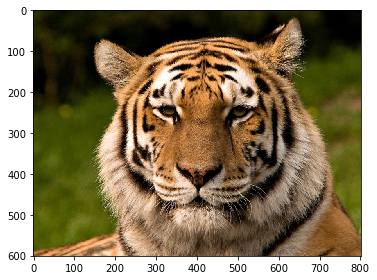

In [4]:
imshow(img_green_pixel)

In [5]:
import numpy
numpy.array_equal(img, img_green_pixel)

False

## Изменение цвета прямоугольника

Загрузите изображение из файла `tiger-gray.png`. Оно имеет нечетное количество строк и столбцов. В центре этого изображения находится прямоугольник размером 7 строк и 15 столбцов. Поменяйте его цвет на розовый rgb(255, 192, 203) и сохраните в файл `tiger-pink.png`.

In [6]:
img = imread('images/tiger-gray.png')

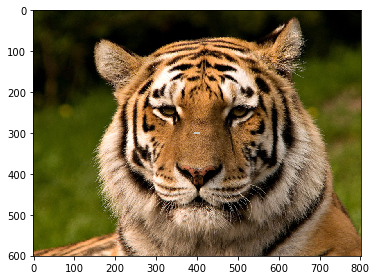

In [7]:
imshow(img)

Проверим, правильно ли мы выделям прямоугольник:

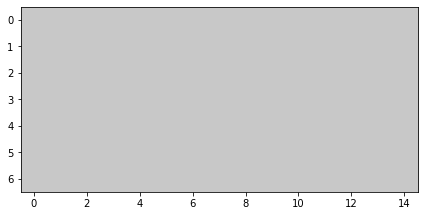

In [8]:
row = img.shape[0]//2
col = img.shape[1]//2
imshow(img[row-3:row+4, col-7:col+8])

In [9]:
img[row-3:row+4, col-7:col+8] = [255, 192, 203]

/home/leo/anaconda3/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


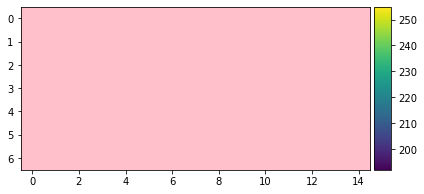

In [10]:
imshow(img[row-3:row+4, col-7:col+8])

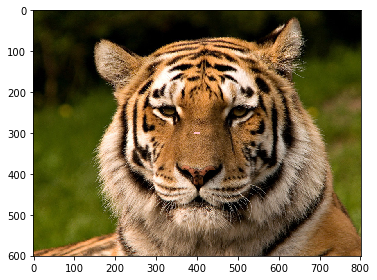

In [11]:
imshow(img)

In [12]:
imsave('images/tiger-pink.png', img)

## Определение рамки изображения

Загрузите изображение из файла `tiger-border.png`. Изображение состоит из рамки сплошного цвета и внутренней части изображения. Цвет рамки можно узнать, посмотрев на левый верхний пиксель. Рамка может иметь разную ширину со всех четырех сторон. Определите размеры рамки и выведите эти размеры через пробел. Размеры рамки выводите в следующем порядке: левый, верхний, правый, нижний.

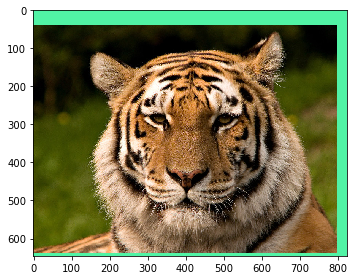

In [13]:
img = imread('images/tiger-border.png')
imshow(img)

In [14]:
img.shape

(646, 826, 3)

In [15]:
border_color = img[0, 0]
rows_num, cols_num, _ = img.shape
i, j, k, m = 0, 0, rows_num-1, cols_num-1

while True:
    pixel_color = img[i, j]
    j += 1  # смещаемся по столбцам
    # проверяем все строки j-го столбца
    if numpy.all(img[:, j] == border_color):
        continue
    else:
        left = j
        break

while True:
    pixel_color = img[i, j]
    i += 1  # смещаемся по строкам
    # проверяем все столбцы i-ой строки
    if numpy.all(img[i, :] == border_color):
        continue
    else:
        top = i
        break

        
while True:
    pixel_color = img[k, m]
    m -= 1  # смещаемся по столбцам от правого нижнего угла
    if numpy.all(img[:, m] == border_color):
        continue
    else:
        right = cols_num-m-1
        break
        
        
while True:
    pixel_color = img[k, m]
    k -= 1
    if numpy.all(img[k, :] == border_color):
        continue
    else:
        bottom = rows_num-k-1
        break

        
print(left, top, right, bottom)

1 39 25 7


# 2.2. Арифметические операции. Каналы. Вычисление яркости изображения

Прочитайте изображение из файла `tiger-color_1.png`. У этого изображения нечетное количество строк и столбцов. Вычислите негатив изображения и сохраните его в файл `tiger-negative.png`.

Для сравнения двух изображений можно воспользоваться функцией numpy.array_equal.

In [16]:
img = imread('images/tiger-color_1.png')

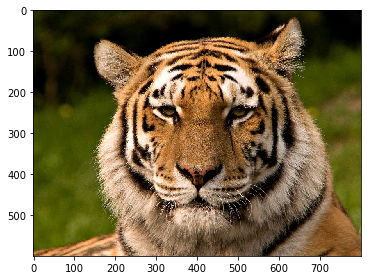

In [17]:
imshow(img)

In [18]:
img[0, 0]

array([41, 46,  6], dtype=uint8)

In [19]:
imsave('images/tiger-negative.png', 255-img)

## Поменять местами каналы изображения

Загрузите изображение из файла `tiger-color.png`. У этого изображения поменяйте местами каналы так, чтобы вместо порядка RGB каналы шли в порядке BRG. Сохраните изображение с измененными каналами в файл `tiger_brg.png`.

In [20]:
from numpy import dstack

img = imread('images/tiger-color.png')
r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]

img_combined = dstack((b, r, g))
       
imsave('images/tiger_brg.png', img_combined)

## Подсчет яркости изображения

Загрузите цветное изображение из файла `tiger-color.png`. Подсчитайте яркость этого изображения и сохраните в файл `tiger-y.png`. Результирующее изображение должно быть одноканальным. Для подсчета яркости используйте формулу $Y = 0.2126 \cdot R + 0.7152 \cdot G + 0.0722 \cdot B$, не забудьте сначала перевести изображение в вещественные числа (функция `img_as_float`), а затем в целые числа (функция `img_as_ubyte`).

In [21]:
from numpy import dstack
from skimage import img_as_float, img_as_ubyte

img = imread('images/tiger-color.png')
img = img_as_float(img)
r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]

gray = 0.2126*r + 0.7152*g + 0.0722*b
gray = img_as_ubyte(gray)

imsave('images/tiger_brg.png', gray)

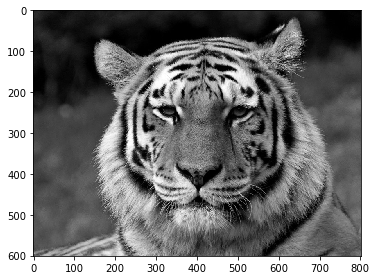

In [22]:
imshow(gray)

# 2.3. Сопоставление фотографий Прокудина-Горского

Проведем загрузку изображения и разделение на три канала. Достаточно разделить изображение на три равные части по высоте. Чтобы более точно найти точки раздела, определим локальные минимумы яркости по высоте.

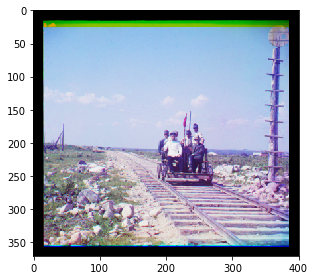

In [23]:
from skimage import img_as_float

import numpy as np

img = imread('images/00.png')

def get_black_row_indices(img):
    """Return accurate indices of black stripes center lines
    """
    sa = 50  # space around point to find minimum
    rows_num = img.shape[0]
    slice_indices = [rows_num//3, 2*rows_num//3]
    for i, si in enumerate(slice_indices):
        res = -sa + np.argmin(img.mean(axis=1)[si-sa:si+sa])
        slice_indices[i] += res
    return slice_indices


def get_trimmed_frame(frame):
    """Cut out white and black stripes by differentiation
    """
    offset = 20
    
    col_mean_diff = np.abs(np.diff(frame.mean(axis=0)))
    col_indices_of_max_diffs = np.where(col_mean_diff > offset)[0]
    col_mdd = np.argmax(np.diff(col_indices_of_max_diffs))

    left_border = col_indices_of_max_diffs[col_mdd]
    right_border = col_indices_of_max_diffs[col_mdd+1]
    
    row_mean_diff = np.abs(np.diff(frame.mean(axis=1)))
    row_indices_of_max_diffs = np.where(row_mean_diff > offset)[0]
    row_mdd = np.argmax(np.diff(row_indices_of_max_diffs))

    top_border = row_indices_of_max_diffs[row_mdd]
    bottom_border = row_indices_of_max_diffs[row_mdd+1]

    return img_as_float(frame[top_border:bottom_border,
                 left_border:right_border])


def get_three_channels(img):
    """Return three RGB channel frames
    """
    bg_i, gr_i = get_black_row_indices(img)
    B = get_trimmed_frame(img[:bg_i, :])
    G = get_trimmed_frame(img[bg_i:gr_i, :])
    R = get_trimmed_frame(img[gr_i:, :])
    return R, G, B

R, G, B = get_three_channels(img)

def line_by_line(X, C):
    i, j, i_opt, j_opt, s = 0, 0, 0, 0, 0
    for i in range(X.shape[0]-C.shape[0]):
        for j in range(X.shape[1]-C.shape[1]):
            Y = np.zeros(X.shape)
            Y[i:i+C.shape[0], j:j+C.shape[1]] = C
            s_new = np.multiply(X, Y).sum()
            if s_new > s:
                s = s_new
                i_opt, j_opt = i, j
    i, j = i_opt, j_opt
    Y = np.zeros(X.shape)
    Y[i:i+C.shape[0], j:j+C.shape[1]] = C
    return Y


def find_align():
    X = np.pad(array = G, pad_width = 15, constant_values = 0)
    #i_opt_R, j_opt_R = line_by_line(X, R)
    #i_opt_B, j_opt_B = line_by_line(X, B)
    XR = line_by_line(X, R)
    XB = line_by_line(X, B)
    imshow(np.dstack((XR, X, XB)))
    
find_align()

# 3.1. Линейная коррекция контраста
## 3.1.1. Автоконтраст черно-белого изображения

Прочитайте изображение из файла `tiger-low-contrast.png`. Примените к нему линейное выравнивание яркости: примените к каждому пикселю функцию

$$f(x) = (x - x_{min}) \cdot \frac{255}{x_{max} - x_{min}}$$
 
После вычисления функции значения изображения окажутся вещественными. Чтобы привести их к целым числам, используйте метод `img.astype('uint8')`, который возвращает изображение в целых числах. Результат сохраните в файл `tiger-high-contrast.png`.

In [24]:
img = imread('images/tiger-low-contrast.png')
new = (img - img.min())*255.0/(img.max() - img.min()).round(decimals=2)
new = new.astype('uint8')
imsave('images/tiger-high-contrast.png', new)

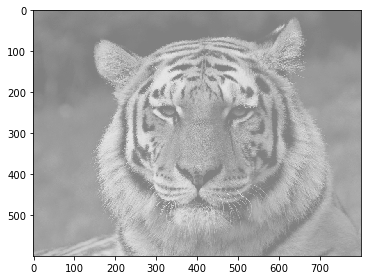

In [25]:
imshow(img)

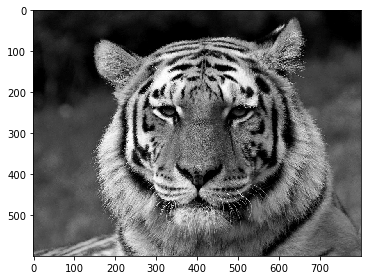

In [26]:
imshow(new)

## 3.1.2. Линейная коррекция контраста – стабильный автоконтраст

Прочитайте изображение из файла `tiger-low-contrast.png`. Подсчитайте минимум и максимум яркости для стабильного автоконтраста этого изображения. Необходимо отбросить 5% самых светлых и 5% самых темных пикселей. Для получения числа отбрасываемых пикселей используйте формулу

$$k = round\left(\#pix \cdot 0.05\right)$$

Два посчитанных числа (минимум и максимум) выведите на стандартный вывод через пробел.

Попробуйте подсчитать минимум и максимум для стабильного автоконтраста двумя способами, указанными в видео.

In [27]:
img = imread('images/tiger-low-contrast.png')
k = round(img.size*0.05)
new = numpy.sort(img.flatten())
new_min = new[k]
new_max = new[img.size-k]
print(new_min, new_max)

129 208


## 3.1.3. Устойчивый автоконтраст черно-белого изображения

Прочитайте изображение из файла `tiger-low-contrast.png`. Примените к нему линейное выравнивание яркости: примените к каждому пикселю функцию

$$f(x) = (x - x_{min}) \cdot \frac{255}{x_{max} - x_{min}}$$

Для вычисления максимума и минимума отбрасывайте по 5% самых светлых и самых темных пикселей (как в предыдущем задании). Перед вычислениями приведите изображение в вещественные числа (`img.astype('float')`), иначе может возникнуть переполнение (т.к. значения некоторых пикселей мы игнорируем при подсчете минимума и максимума). После растяжения яркости обрежьте значения изображения от 0 до 255 с помощью функции `numpy.clip`.

После вычисления функции значения изображения окажутся вещественными. Чтобы привести их к целым числам, используйте метод `img.astype('uint8')`, который возвращает изображение в целых числах. 

In [28]:
img = imread('images/tiger-low-contrast.png')
k = round(img.size*0.05)
n = numpy.sort(img.flatten())
new_min = n[k]
new_max = n[-k]

img = img.astype('float')

new = ((img - new_min)*255.0/(new_max - new_min))
new = numpy.clip(new, 0, 255)
new = new.astype('uint8')
imsave('images/tiger-stable-contrast.png', new)

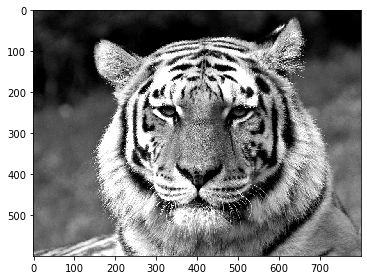

In [29]:
imshow(new)

## 3.2.2. Устойчивый цветной автоконтраст

Прочитайте цветное изображение из файла img.png. Примените к нему устойчивый автоконтраст. Для этого:
1. Переведите изображение в вещественные числа от 0 до 1.
2. Переведите изображение в пространство YUV по формулам:

$$\begin{align*} Y &= ~~\,0.2126 \cdot R + 0.7152 \cdot G + 0.0722 \cdot B\\ U &= -0.0999 \cdot R - 0.3360 \cdot G + 0.4360 \cdot B\\ V &= ~~\,0.6150 \cdot R - 0.5586 \cdot G - 0.0563 \cdot B \end{align*}$$
3. Найдите максимум и минимум для устойчивого автоконтраста с отбрасыванием 5% самых светлых и 5% самых темных пикселей.
4. Примените линейное растяжение канала Y по формуле

$$f(x) = (x - x_{min}) \cdot \frac{255}{x_{max} - x_{min}}$$

5. Обрежьте значения канала Y от 0 до 1.
6. Переведите изображение в пространство RGB по формулам:

$$\begin{align*} R &= Y + 1.2803 \cdot V\\ G &= Y - 0.2148 \cdot U - 0.3805 \cdot V\\ B &= Y + 2.1279 \cdot U \end{align*} $$
7. Обрежьте значения изображения от 0 до 1.
8. Переведите изображение в целые числа от 0 до 255.

In [30]:
import numpy as np
from skimage.io import imread, imshow, imsave 
from skimage.util import img_as_float, img_as_ubyte

img   = imread('images/tiger-color.png')
red   = img_as_float(img[:,:,0])
green = img_as_float(img[:,:,1])
blue  = img_as_float(img[:,:,2])

Y =  0.2126 * red + 0.7152 * green + 0.0722 * blue
U = -0.0999 * red - 0.3360 * green + 0.4360 * blue
V =  0.6150 * red - 0.5586 * green - 0.0563 * blue

min_p = np.percentile(Y.reshape(-1), 5)
max_p = np.percentile(Y.reshape(-1), 95)

Y = (Y - min_p) * (1 /(max_p - min_p))

Y = np.clip(Y, 0, 1.0)

R = Y + 1.2803 * V
G = Y - 0.2148 * U - 0.3805 * V
B = Y + 2.1279 * U

R = img_as_ubyte(np.clip(R, 0, 1.0))
G = img_as_ubyte(np.clip(G, 0, 1.0))
B = img_as_ubyte(np.clip(B, 0, 1.0))

rgb = np.dstack((R,G,B))
imsave('images/tiger-stable-contrast.png', rgb)

## 3.3. Преобразование серого мира

Прочитайте изображение из файла `railroad.png`. Примените к нему преобразование серого мира. Для этого:
1. Сконвертируйте изображение в вещественные числа.
2. Подсчитайте коэффициенты $r_w$, $g_w$, $b_wr$ как описано в видео.
3. Поделите каналы изображения на коэффициенты.
4. Обрежьте значения пикселей, чтобы они не выходили из допустимого диапазона ([0; 255] или [0;1]).
Результат сохраните в файл `railroad-gray-world.png`.

In [31]:
img = imread('images/railroad.png')
red   = img_as_float(img[:,:,0])
green = img_as_float(img[:,:,1])
blue  = img_as_float(img[:,:,2])

AVG = (red.mean() + green.mean() + blue.mean())/3
r_w = red.mean()/AVG
g_w = green.mean()/AVG
b_w = blue.mean()/AVG

R = red/r_w
G = green/g_w
B = blue/b_w

R = img_as_ubyte(np.clip(R, 0, 1.0))
G = img_as_ubyte(np.clip(G, 0, 1.0))
B = img_as_ubyte(np.clip(B, 0, 1.0))

rgb = np.dstack((R,G,B))
imsave('images/railroad-gray-world.png', rgb)

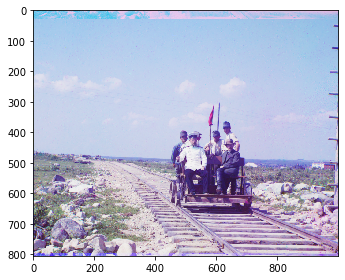

In [32]:
imshow('images/railroad.png')

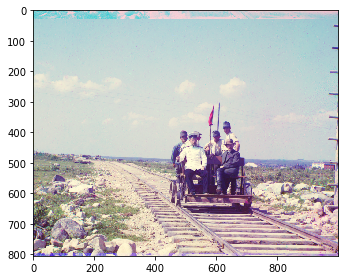

In [33]:
imshow('images/railroad-gray-world.png')

## 3.4. Выравнивание гистограммы

Прочитайте изображение из файла `landscape.png`. Примените к нему выравнивание гистограммы по алгоритму, описанному в слайдах и видео. Работать достаточно в целых числах, помещающихся в байт (т.е. изображение конвертировать не нужно). Результат сохраните в файл `landscape-histeq.png`.

**Решение**. Воспользуемся формулой из лекции:
$$f(x) = round \left(\dfrac{cdf(x) - cdf_{min}}{\#pix - 1} \cdot 255 \right).$$

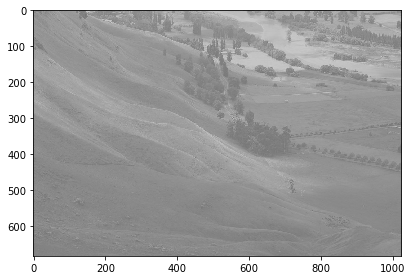

In [34]:
img = imread('images/landscape.png')
imshow(img)

In [35]:
from numpy import histogram

# создадим гистограмму
hist, bin_edges = histogram(img, bins=256, range=(0, 255))

# для нахождения cdf воспользуемся кумулятивной суммой
cdf = numpy.cumsum(hist)

# найдем минимальное ненулевое значение
cdf_min = cdf.nonzero()[0].min()

# найдем массив обновленных значений
f_x = numpy.round((cdf-cdf_min)*255/(img.size-1)).astype('uint8')

# сопоставим старому значению яркости обновленное значение
f = lambda x: f_x[x]

imsave('images/landscape-histeq.png', f(img))

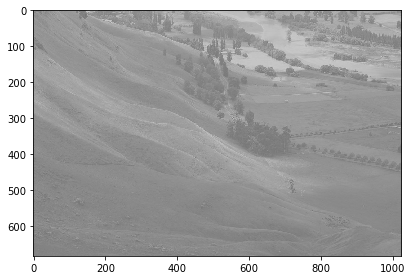

In [36]:
imshow(img)

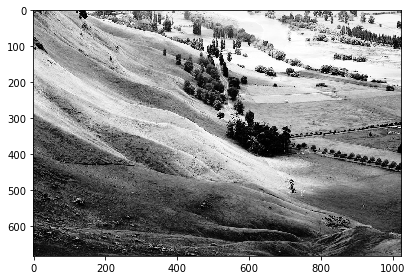

In [37]:
imshow(f(img))

## 4.1. Свертка

Выполните свертку изображения

$$\begin{bmatrix} 0 & -8 & -3 & -2\\ 1 & 9 & -8 & 0\\ 9 & -4 & 5 & -9\\ 6 & -4 & 6 & 3 \end{bmatrix}$$
 
с ядром
$$\begin{bmatrix} 4 & -5 & 4 \\ -6 & -8 & -2\\ 1 & 5 & 5 \end{bmatrix}$$
Результат выпишите построчно через пробел.


In [38]:
import scipy.signal

a = numpy.array([[0, -8, -3, -2],
                 [1, 9, -8, 0],
                 [9, -4, 5, -9],
                 [6, -4, 6, 3]])

b = numpy.array([[4, -5, 4],
                 [-6, -8, -2],
                 [1, 5, 5]])

c = scipy.signal.convolve2d(a, b, mode='valid')

for i in c:
    print(*i)

7 -88
94 -7


## 4.1.2. Box-фильтр

Реализуйте box-фильтрацию изображения окном $5 \times 5$ пикселей. Дополнять изображение не нужно (т.е. изображение после фильтрации уменьшится). Прочитайте изображение из файла `tiger-gray-small.png` и сохраните результат фильтрации в файл `box-tiger.png`.

In [39]:
img = imread('images/tiger-gray-small.png')

kernel = numpy.full((5, 5), 1)
c = scipy.signal.convolve2d(img, kernel, mode='valid')
c = c/25

imsave('images/box-tiger.png', c.astype('uint8'))

Подсчет функции Гаусса

На вход подаются три числа: $\sigma$, $x$, $y$. Подсчитайте значение функции Гаусса в этой точке. Формула для функции Гаусса:
$$G_{\sigma}(x, y) = \frac{1}{2\pi\sigma^2}e^{\frac{-x^2-y^2}{2\sigma^2}}$$

In [94]:
from math import *

def Gauss(sigma, x, y):
    return 1/(2*pi*sigma**2)*e**(-0.5*(x**2 + y**2)/sigma**2)

sigma, x, y = 1, 1, 1
res = Gauss(sigma, x, y)
print(res)

0.05854983152431917


**Ядро гауссовского фильтра**. На стандартный вход подается параметр $\sigma$ гауссовского фильтра. Подсчитайте и напечатайте на стандартый вывод элементы ядра.

In [167]:
import numpy
import sys

#sigma = float(input())
simga = 1

# учитываем, что размер ядра зависит от sigma
a = int(round(sigma*6)+1)
print(a)

x_range = numpy.arange(-a//2+1, a//2+1, 1)
y_range = numpy.arange(-a//2+1, a//2+1, 1)
xy = numpy.zeros((a, a))

print(x_range)

def Gauss(sigma, x, y):
    return 1/(2*numpy.pi*sigma**2)*numpy.exp(-0.5*(x**2 + y**2)/sigma**2)

for i, x in enumerate(x_range):
    for j, y in enumerate(y_range):
        xy[i][j] = Gauss(0.33, x, y)
        
xy = xy/xy.sum()

numpy.savetxt(sys.stdout, xy, fmt="%.5f")

3
[-1  0  1]
0.00010 0.00974 0.00010
0.00974 0.96065 0.00974
0.00010 0.00974 0.00010


In [180]:
import numpy
import sys

sigma = float(input())
a = int(round(sigma*6)+1)

x_range = numpy.arange(-a//2+1, a//2+1, 1)
y_range = numpy.arange(-a//2+1, a//2+1, 1)
xy = numpy.zeros((a, a))

def Gauss(sigma, x, y):
    return 1/(2*numpy.pi*sigma**2)*numpy.exp(-0.5*(x**2 + y**2)/sigma**2)

for i, x in enumerate(x_range):
    for j, y in enumerate(y_range):
        xy[i][j] = Gauss(sigma, x, y)
        
xy = xy/xy.sum()

numpy.savetxt(sys.stdout, xy, fmt="%.5f")

 1


[-3 -2 -1  0  1  2  3]
0.00002 0.00024 0.00107 0.00177 0.00107 0.00024 0.00002
0.00024 0.00292 0.01307 0.02155 0.01307 0.00292 0.00024
0.00107 0.01307 0.05858 0.09658 0.05858 0.01307 0.00107
0.00177 0.02155 0.09658 0.15924 0.09658 0.02155 0.00177
0.00107 0.01307 0.05858 0.09658 0.05858 0.01307 0.00107
0.00024 0.00292 0.01307 0.02155 0.01307 0.00292 0.00024
0.00002 0.00024 0.00107 0.00177 0.00107 0.00024 0.00002


**Гауссовская фильтрация**. Профильтруйте изображение гауссовским ядром с $\sigma=0.66$. Для подсчета ядра используйте функцию из предыдущего задания. При подсчете новых значений изображения не забывайте обрезать их с помощью `numpy.clip`. Дополнять изображение не нужно (т.е. изображение после фильтрации уменьшится).

In [181]:
img = imread('images/tiger-gray-small.png')

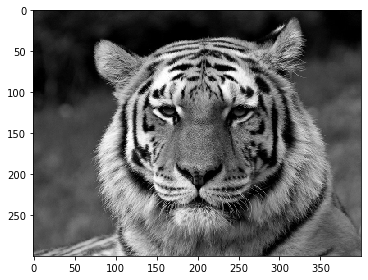

In [183]:
imshow(img)

In [191]:
def Gauss_filter(sigma):
    a = int(round(sigma*6)+1)

    x_range = numpy.arange(-a//2+1, a//2+1, 1)
    y_range = numpy.arange(-a//2+1, a//2+1, 1)
    xy = numpy.zeros((a, a))

    def Gauss(sigma, x, y):
        return 1/(2*numpy.pi*sigma**2)*numpy.exp(-0.5*(x**2 + y**2)/sigma**2)

    for i, x in enumerate(x_range):
        for j, y in enumerate(y_range):
            xy[i][j] = Gauss(sigma, x, y)

    xy = xy/xy.sum()
    return xy

sigma = 0.66
kernel = Gauss_filter(sigma)

In [195]:
numpy.savetxt(sys.stdout, kernel, fmt="%.5f")

0.00004 0.00117 0.00370 0.00117 0.00004
0.00117 0.03677 0.11586 0.03677 0.00117
0.00370 0.11586 0.36513 0.11586 0.00370
0.00117 0.03677 0.11586 0.03677 0.00117
0.00004 0.00117 0.00370 0.00117 0.00004


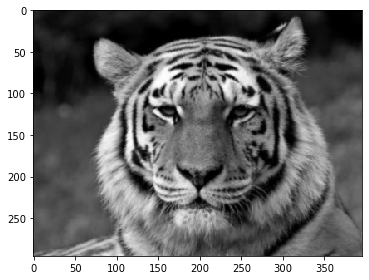

In [205]:
new = scipy.signal.convolve2d(img, kernel, mode='valid')
imshow(new.astype('uint8'))

**Повышение резкости изображения**. Реализуйте повышение четкости изображения путём фильтрации изображения с ядром

$$\frac{1}{10} \begin{bmatrix} -1 & -2 & -1 \\ -2 & 22 & -2 \\ -1 & -2 & -1 \end{bmatrix}$$

При подсчете новых значений изображения не забывайте обрезать их с помощью numpy.clip. Дополнять изображение не нужно (т.е. изображение после фильтрации уменьшится). 

In [ ]:
img = imread('')

In [206]:
kernel = numpy.array(([-0.1,-0.2,-0.1],[-0.2,2.2,-0.2],[-0.1,-0.2,-0.1]))